<a href="https://colab.research.google.com/github/MSURENDRAN/AIML_Machine_Learning_Lab/blob/main/2348527_Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

In [79]:
cp=pd.read_csv('/content/Churn_Modelling.csv')

In [80]:
cp.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [81]:
cp.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6105,6106,15605134,Bond,617,France,Female,34,0,131244.65,2,1,0,183229.02,0
616,617,15719352,Davidson,754,Spain,Male,39,6,170184.99,2,1,0,89593.26,0
6635,6636,15678374,Colombo,666,France,Female,59,5,0.00,2,1,1,185123.09,0
9857,9858,15779423,K?,716,France,Male,39,1,70657.61,2,1,1,76476.05,0
121,122,15580203,Kennedy,674,Spain,Male,39,6,120193.42,1,0,0,100130.95,0


In [82]:
cp.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [83]:
cp.shape

(10000, 14)

In [84]:
cp.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [85]:
cp['Age'].mean()

38.9218

In [86]:
cp.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [87]:
cp.select_dtypes(["int64","float64"]).columns

Index(['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [88]:
for col in cp.select_dtypes(["int64","float64"]).columns:
  cp[col]=cp[col].fillna(cp[col].mean())
  print(cp[col].mean())

5000.5
15690940.5694
650.5288
38.9218
5.0128
76485.889288
1.5302
0.7055
0.5151
100090.239881
0.2037


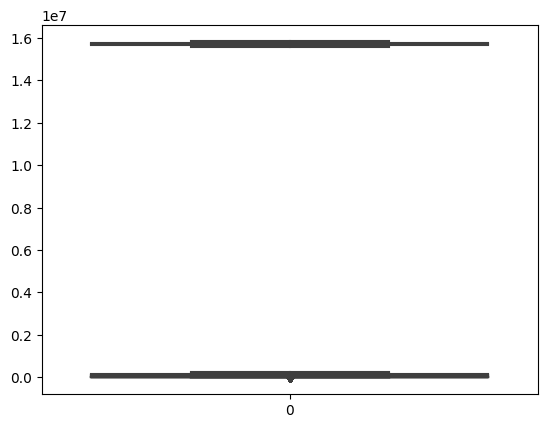

In [89]:
for col in cp.select_dtypes(["int64","float64"]).columns:
  sns.boxplot(cp[col])

In [90]:
df=cp.select_dtypes(["int64","float64"])
print(df)

      RowNumber  CustomerId  CreditScore  Age  Tenure    Balance  \
0             1    15634602          619   42       2       0.00   
1             2    15647311          608   41       1   83807.86   
2             3    15619304          502   42       8  159660.80   
3             4    15701354          699   39       1       0.00   
4             5    15737888          850   43       2  125510.82   
...         ...         ...          ...  ...     ...        ...   
9995       9996    15606229          771   39       5       0.00   
9996       9997    15569892          516   35      10   57369.61   
9997       9998    15584532          709   36       7       0.00   
9998       9999    15682355          772   42       3   75075.31   
9999      10000    15628319          792   28       4  130142.79   

      NumOfProducts  HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0                 1          1               1        101348.88       1  
1                 1          0     

In [91]:
from scipy import stats
print(df.shape)
z_scores = stats.zscore(df)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]
print(df.shape)

(10000, 11)
(9799, 11)


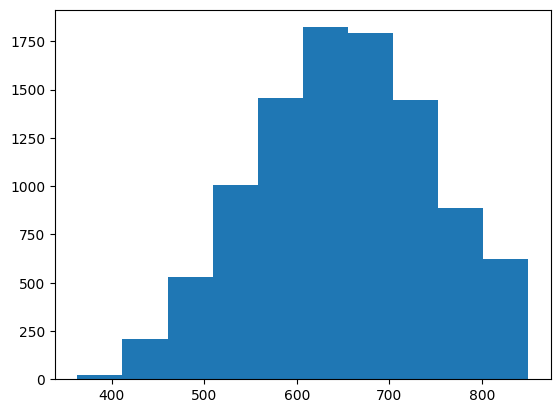

In [92]:
plt.hist(df["CreditScore"])
plt.show()

In [95]:
df["Age"] = pd.cut(df["Age"], [18, 25, 35, 45, 55, 65])

In [101]:
print(df["Age"])

0       (35, 45]
1       (35, 45]
2       (35, 45]
3       (35, 45]
4       (35, 45]
          ...   
9995    (35, 45]
9996    (25, 35]
9997    (35, 45]
9998    (35, 45]
9999    (25, 35]
Name: Age, Length: 9799, dtype: category
Categories (5, interval[int64, right]): [(18, 25] < (25, 35] < (35, 45] < (45, 55] < (55, 65]]


<Axes: xlabel='Age', ylabel='count'>

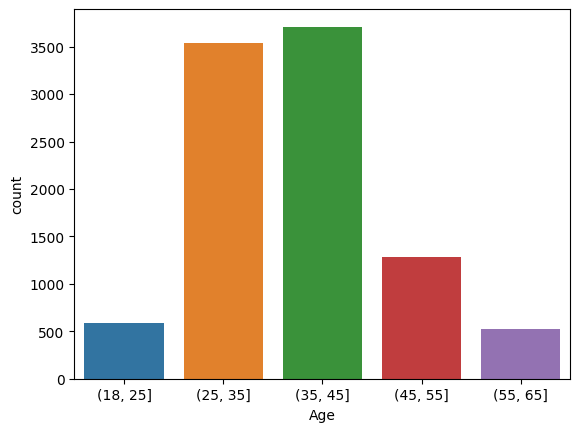

In [97]:
sns.countplot(x ='Age', data = df)



<Axes: xlabel='Age', ylabel='Exited'>

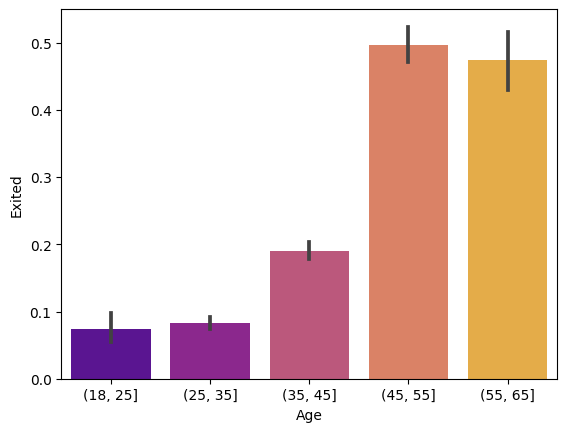

In [98]:
sns.barplot(x ='Age', y ='Exited', data = df,  palette ='plasma', estimator = np.mean)


<ipython-input-99-11928c89b839>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  plt.matshow(df.corr())


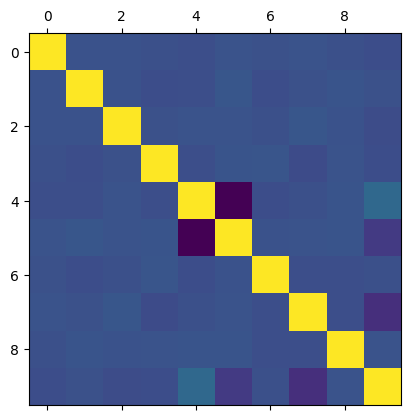

In [99]:
plt.matshow(df.corr())
plt.show()

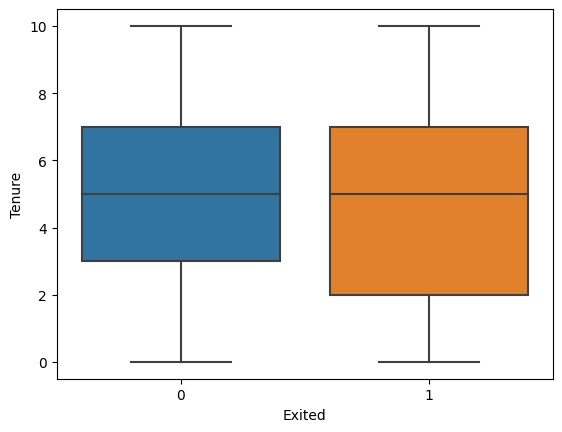

In [102]:
sns.boxplot(x='Exited', y='Tenure', data=df)
plt.show()

In [104]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[[ 'Balance', 'Tenure']])

In [105]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

In [107]:
selector = SelectKBest(score_func=f_classif, k=3)
selected_features = selector.fit_transform(df[['Balance', 'Tenure', 'Exited']], df['Exited'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw


In [111]:
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(df.drop('Balance', axis=1), df['Exited'])


ValueError: ignored